In [3]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data_gen=ImageDataGenerator(rescale=1./255)
val_data_gen=ImageDataGenerator(rescale=1./255)


In [5]:
train_gen=train_data_gen.flow_from_directory('/kaggle/input/fer2013/train',
                                             target_size=(48,48),
                                            batch_size=64,
                                             color_mode='grayscale',
                                             class_mode='categorical')
val_gen=val_data_gen.flow_from_directory('/kaggle/input/fer2013/test',
                                        target_size=(48,48),
                                        batch_size=64,
                                        color_mode='grayscale',
                                        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))


In [14]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model2.add(BatchNormalization())
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(0.25))

model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(7, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ... (remaining code is unchanged)

hist = model2.fit(
    train_gen,
    validation_data=val_gen,
    shuffle=True,
    epochs=50,
    callbacks=callbacks,
)

Epoch 1/50


2023-12-24 19:26:28.251070: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


449/449 [==============================] - ETA: 0s - loss: 1.9268 - accuracy: 0.3566
Epoch 1: val_loss did not improve from 1.03445
449/449 [==============================] - 57s 119ms/step - loss: 1.9268 - accuracy: 0.3566 - val_loss: 2.7962 - val_accuracy: 0.1541 - lr: 0.0010
Epoch 2/50
449/449 [==============================] - ETA: 0s - loss: 1.4280 - accuracy: 0.4720
Epoch 2: val_loss did not improve from 1.03445
449/449 [==============================] - 54s 121ms/step - loss: 1.4280 - accuracy: 0.4720 - val_loss: 1.4049 - val_accuracy: 0.4844 - lr: 0.0010
Epoch 3/50
449/449 [==============================] - ETA: 0s - loss: 1.2724 - accuracy: 0.5218
Epoch 3: val_loss did not improve from 1.03445
449/449 [==============================] - 53s 118ms/step - loss: 1.2724 - accuracy: 0.5218 - val_loss: 1.3277 - val_accuracy: 0.5171 - lr: 0.0010
Epoch 4/50
449/449 [==============================] - ETA: 0s - loss: 1.2020 - accuracy: 0.5461
Epoch 4: val_loss did not improve from 1.0344

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
callbacks = [
            EarlyStopping(patience = 15, verbose=1),
            ReduceLROnPlateau(factor = 0.5, patience = 6, min_lr = 0.000001, verbose=1),
            ModelCheckpoint('emotion.h5', monitor='val_loss', save_best_only=True,
            verbose=1)

    ]

hist = model.fit(
    train_gen,
    validation_data=val_gen,
    shuffle=True,
    epochs=50,
    callbacks=callbacks,
)

Epoch 1/50


2023-12-24 18:19:18.223663: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


449/449 [==============================] - ETA: 0s - loss: 1.7610 - accuracy: 0.2792
Epoch 1: val_loss improved from inf to 1.59650, saving model to emotion.h5
449/449 [==============================] - 197s 403ms/step - loss: 1.7610 - accuracy: 0.2792 - val_loss: 1.5965 - val_accuracy: 0.3688 - lr: 0.0010
Epoch 2/50


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


449/449 [==============================] - ETA: 0s - loss: 1.4919 - accuracy: 0.4224
Epoch 2: val_loss improved from 1.59650 to 1.36448, saving model to emotion.h5
449/449 [==============================] - 54s 119ms/step - loss: 1.4919 - accuracy: 0.4224 - val_loss: 1.3645 - val_accuracy: 0.4687 - lr: 0.0010
Epoch 3/50
449/449 [==============================] - ETA: 0s - loss: 1.3307 - accuracy: 0.4897
Epoch 3: val_loss improved from 1.36448 to 1.23336, saving model to emotion.h5
449/449 [==============================] - 54s 121ms/step - loss: 1.3307 - accuracy: 0.4897 - val_loss: 1.2334 - val_accuracy: 0.5302 - lr: 0.0010
Epoch 4/50
449/449 [==============================] - ETA: 0s - loss: 1.2507 - accuracy: 0.5250
Epoch 4: val_loss improved from 1.23336 to 1.17946, saving model to emotion.h5
449/449 [==============================] - 53s 119ms/step - loss: 1.2507 - accuracy: 0.5250 - val_loss: 1.1795 - val_accuracy: 0.5552 - lr: 0.0010
Epoch 5/50
449/449 [=========================

In [10]:
model.save_weights('emotion.h5')

In [11]:
model_json=model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)

In [16]:
model2.save_weights('emotion2.h5')
model_json2=model2.to_json()
with open('model2.json','w') as json_file:
    json_file.write(model_json2)

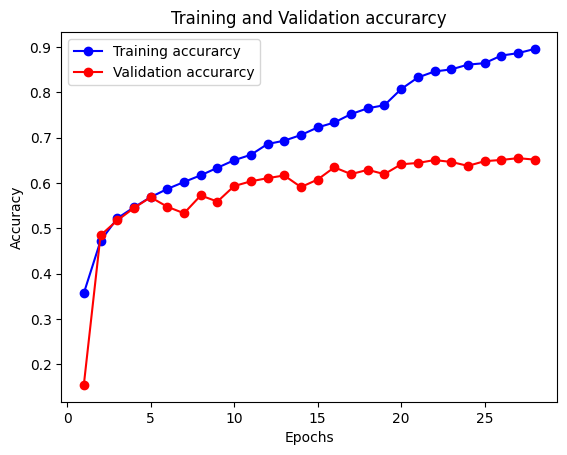

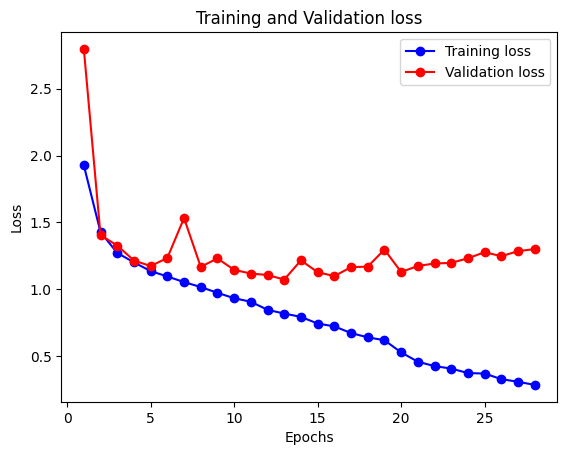

In [18]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b-o', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r-o', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b-o', label='Training loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model2.evaluate(val_gen)

113/113 [==============================] - 11s 93ms/step - loss: 1.3012 - accuracy: 0.6514


[1.3011506795883179, 0.6514349579811096]